In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import minmax_scale

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv("binary.txt",sep='\t',header=(0))

In [5]:
df.head()

,Unnamed: 0,admit,gre,gpa,rank
0,1,0,380,3.61,3
1,2,1,660,3.67,3
2,3,1,800,4.00,1
3,4,1,640,3.19,4
4,5,0,520,2.93,4


In [6]:
dependent_variable = df['admit']
independent_variable = df[['gre', 'gpa']]

In [7]:
print(dependent_variable.head())

print(independent_variable.head())

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64
   gre   gpa
0  380  3.61
1  660  3.67
2  800  4.00
3  640  3.19
4  520  2.93


In [8]:
np.mean(independent_variable)

gre    587.7000
gpa      3.3899
dtype: float64

In [9]:
np.std(independent_variable)

gre    115.372050
gpa      0.380091
dtype: float64

In [12]:
norm_inde_var = minmax_scale(independent_variable)

In [14]:
df_inde_var = pd.DataFrame(norm_inde_var)

In [15]:
df_inde_var.head(1)

,0,1
0,0.275862,0.775862


In [16]:
np.mean(df_inde_var)

0    0.633966
1    0.649368
dtype: float64

NameError: name 'corre_inde_var' is not defined

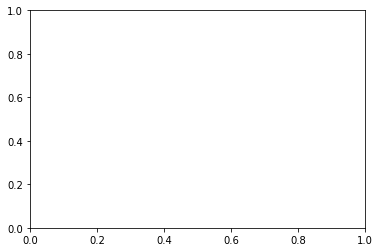

In [17]:
name = ['gre', 'gpa']
names = ['gpa','gre']
core_inde_var = df_inde_var.corr()
fig = plt.figure()
ax =fig.add_subplot(111)
cax = ax.matshow(corre_inde_var, vmin= -1, vmax = 1)
fig.colorbar(cax)
ticks =np.arange(0,9,1)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
ax.set_xticklabels(name)
ax.set_yticklabels(names)
plt.show()
print(core_inde_var)

In [18]:
 from sklearn.decomposition import PCA
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
covariant_matrix = np.cov(norm_inde_var)
covariant_matrix[0:5]

array([[ 0.125     ,  0.01293103,  0.        , ..., -0.05028736,
        -0.00718391,  0.0704023 ],
       [ 0.01293103,  0.00133769,  0.        , ..., -0.00520214,
        -0.00074316,  0.007283  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04741379, -0.00490488,  0.        , ...,  0.01907451,
         0.00272493, -0.02670432],
       [-0.03304598, -0.00341855,  0.        , ...,  0.01329436,
         0.00189919, -0.0186121 ]])

In [20]:
eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)
eigen_values[0:5], eigen_vectors[0:5]

(array([ 1.08256705e+01+0.00000000e+00j,  5.07191485e-16+8.13224041e-16j,
         5.07191485e-16-8.13224041e-16j, -5.15868591e-16+0.00000000e+00j,
        -8.48732925e-17+4.52632352e-16j]),
 array([[ 0.10745524+0.j        ,  0.11734163+0.02876832j,
          0.11734163-0.02876832j, ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.01111606+0.j        , -0.03883705+0.03768768j,
         -0.03883705-0.03768768j, ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.        +0.j        ,
         -0.        -0.j        , ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [-0.04075888+0.j        ,  0.03691164-0.01479768j,
          0.03691164+0.01479768j, ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [-0.02840771+0.j        , -0.03920651-0.00258145j,
         -0.039206

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


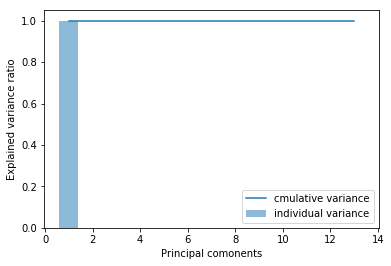

In [22]:
tot = sum(eigen_values[:1])
var_exp = [(i / tot) for i in sorted(eigen_values[:13], reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center', label= 'individual variance')
step(range(1,14), cum_var_exp, where='mid', label='cmulative variance')
ylabel('Explained variance ratio')
xlabel('Principal comonents')
legend(loc='best')
show()

In [23]:
x = df_inde_var
pca =PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.69690722 0.30309278]
[4.93274158 3.2530346 ]
